# Human pancreas mapping task

By Yang Zhou

This notebook reproduces the Fig 3 in the scInt paper. The human pancreas dataset was obtained from SeruatData package ("panc8" data), and was normalized.

In [1]:
library(scInt)
source("C:/Users/ZhouYang/Desktop/reproducibility/utils.R")
fig.size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width, repr.plot.res = 300)
}

Warning message:
"package 'ggplot2' was built under R version 4.0.5"

********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots


Loading required package: RcppAnnoy

Warning message:
"package 'RcppAnnoy' was built under R version 4.0.3"
Warning message:
"package 'RColorBrewer' was built under R version 4.0.3"
Loading required package: grid

Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.0.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend




## Load data and meta data

In [1]:
reference.dataset <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Human_pancreas/reference.dataset.rds")
reference.meta <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Human_pancreas/reference.meta.rds")
query.dataset <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Human_pancreas/query.dataset.rds")
query.meta <- readRDS("C:/Users/ZhouYang/Desktop/reproducibility/Human_pancreas/query.meta.rds")
meta <- rbind(reference.meta, query.meta)
meta$dataset <- factor(meta$dataset, levels = c("reference", "query"))

## Reference integration

0 cells are filtered in the celseq

0 cells are filtered in the celseq2

0 cells are filtered in the c1

0 cells are filtered in the smartseq

14 genes are filtered

Compute the Adjusted Cross-batch Similarity

Find similar cells for batch 1

Done!

Find similar cells for batch 2

Done!

Find similar cells for batch 3

Done!

Find similar cells for batch 4

Done!



Time difference of 12.05952 secs
Time difference of 23.55697 secs


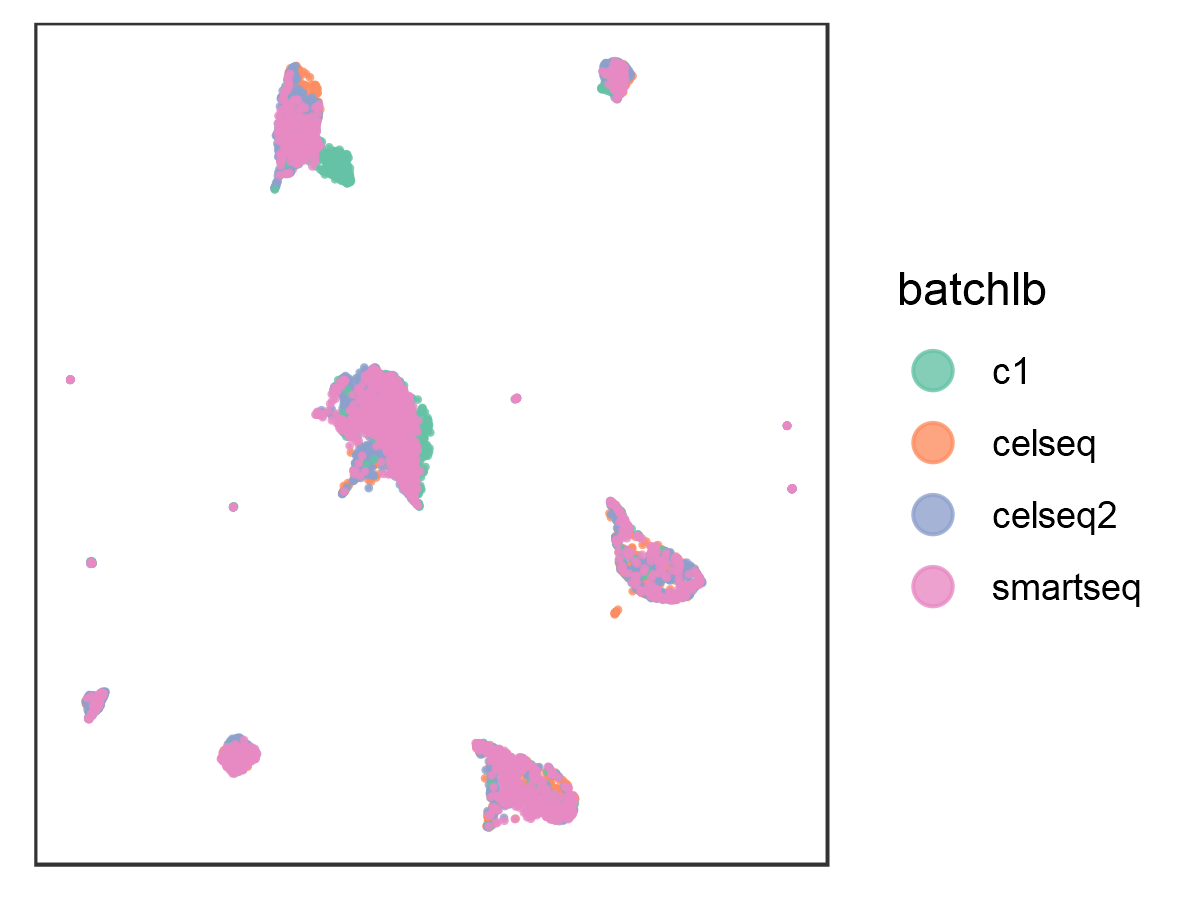

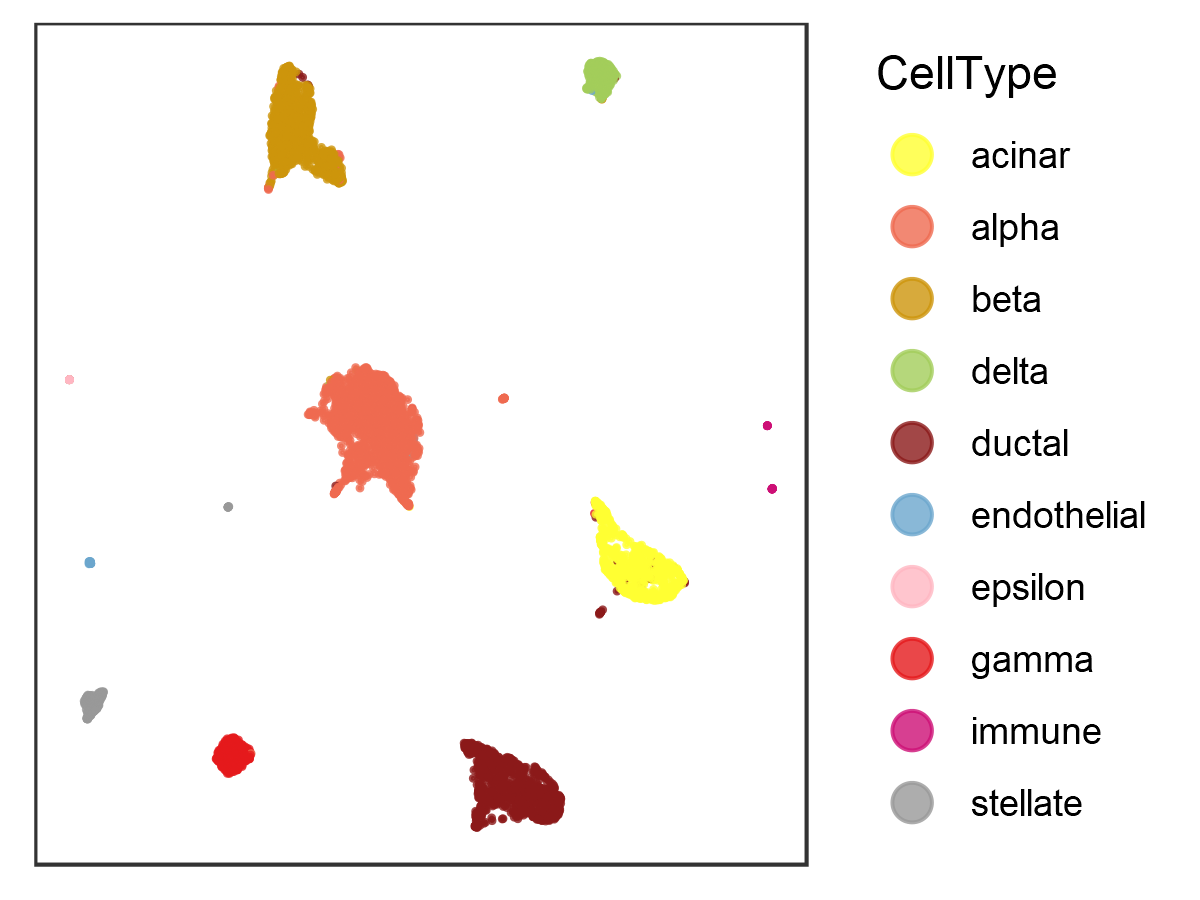

In [3]:
reference.data <- create.scInt(reference.dataset, reference.meta)
#reference.data <- normalize.Data(reference.data)
reference.data <- ident.cellIdentity(reference.data, nfeatures = 1000, select.var = 'union')
reference.data <- compute.Similarity(reference.data, k = 5, T_th = 0.75, dims = 50)
reference.data <- run.Integrate(reference.data, npcs = 20, lambda = 5)
reference.data <- run.umap(reference.data, min_dist = .1)
fig.size(3, 4)
dim.plot(reference.data@int.umap, reference.data@meta, colFactor = "batchlb", col.rev = T, size = 0.1)
dim.plot(reference.data@int.umap, reference.data@meta, colFactor = "CellType", size = 0.1)

## Mapping

In [4]:
query.data <- create.scInt(query.dataset, query.meta, filter = F)
#query.data <- normalize.Data(query.data)
query.data <- ident.cellIdentity(query.data, nfeatures = 1000, select.var = 'union', 
                                    vargenes = intersect(reference.data@vargenes, rownames(query.data@norm.data[[1]])))
query.data <- compute.Similarity(query.data, k = 5, T_th = 0.75, dims = 50)
query.data <- run.Integrate(query.data, npcs = 20, lambda = 5)
res_scInt_cpca  <- run.Mapping(ref.data = reference.data, query.data = query.data, npcs = 20, model = "cpca") %>% run.umap()
res_scInt_projection <- run.Mapping(ref.data = reference.data, query.data = query.data, npcs = 20, model = "projection") %>% run.umap()
res_scInt_global <- run.Mapping(ref.data = reference.data, query.data = query.data, npcs = 20, model = "global") %>% run.umap()
colnames(res_scInt_cpca) <- c("UMAP1", "UMAP2")
res_scInt_cpca <- cbind(meta, res_scInt_cpca)
colnames(res_scInt_projection) <- c("UMAP1", "UMAP2")
res_scInt_projection <- cbind(meta, res_scInt_projection)
colnames(res_scInt_global) <- c("UMAP1", "UMAP2")
res_scInt_global <- cbind(meta, res_scInt_global)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Compute the Adjusted Cross-batch Similarity

Find similar cells for batch 1

Done!

Find similar cells for batch 2

Done!

Find similar cells for batch 3

Done!

Find similar cells for batch 4

Done!



Time difference of 19.078 secs
Time difference of 37.3727 secs
Time difference of 25.93224 secs
Time difference of 3.655251 secs


Compute similarities under reference projection.

Mapping...



Time difference of 1.520057 mins


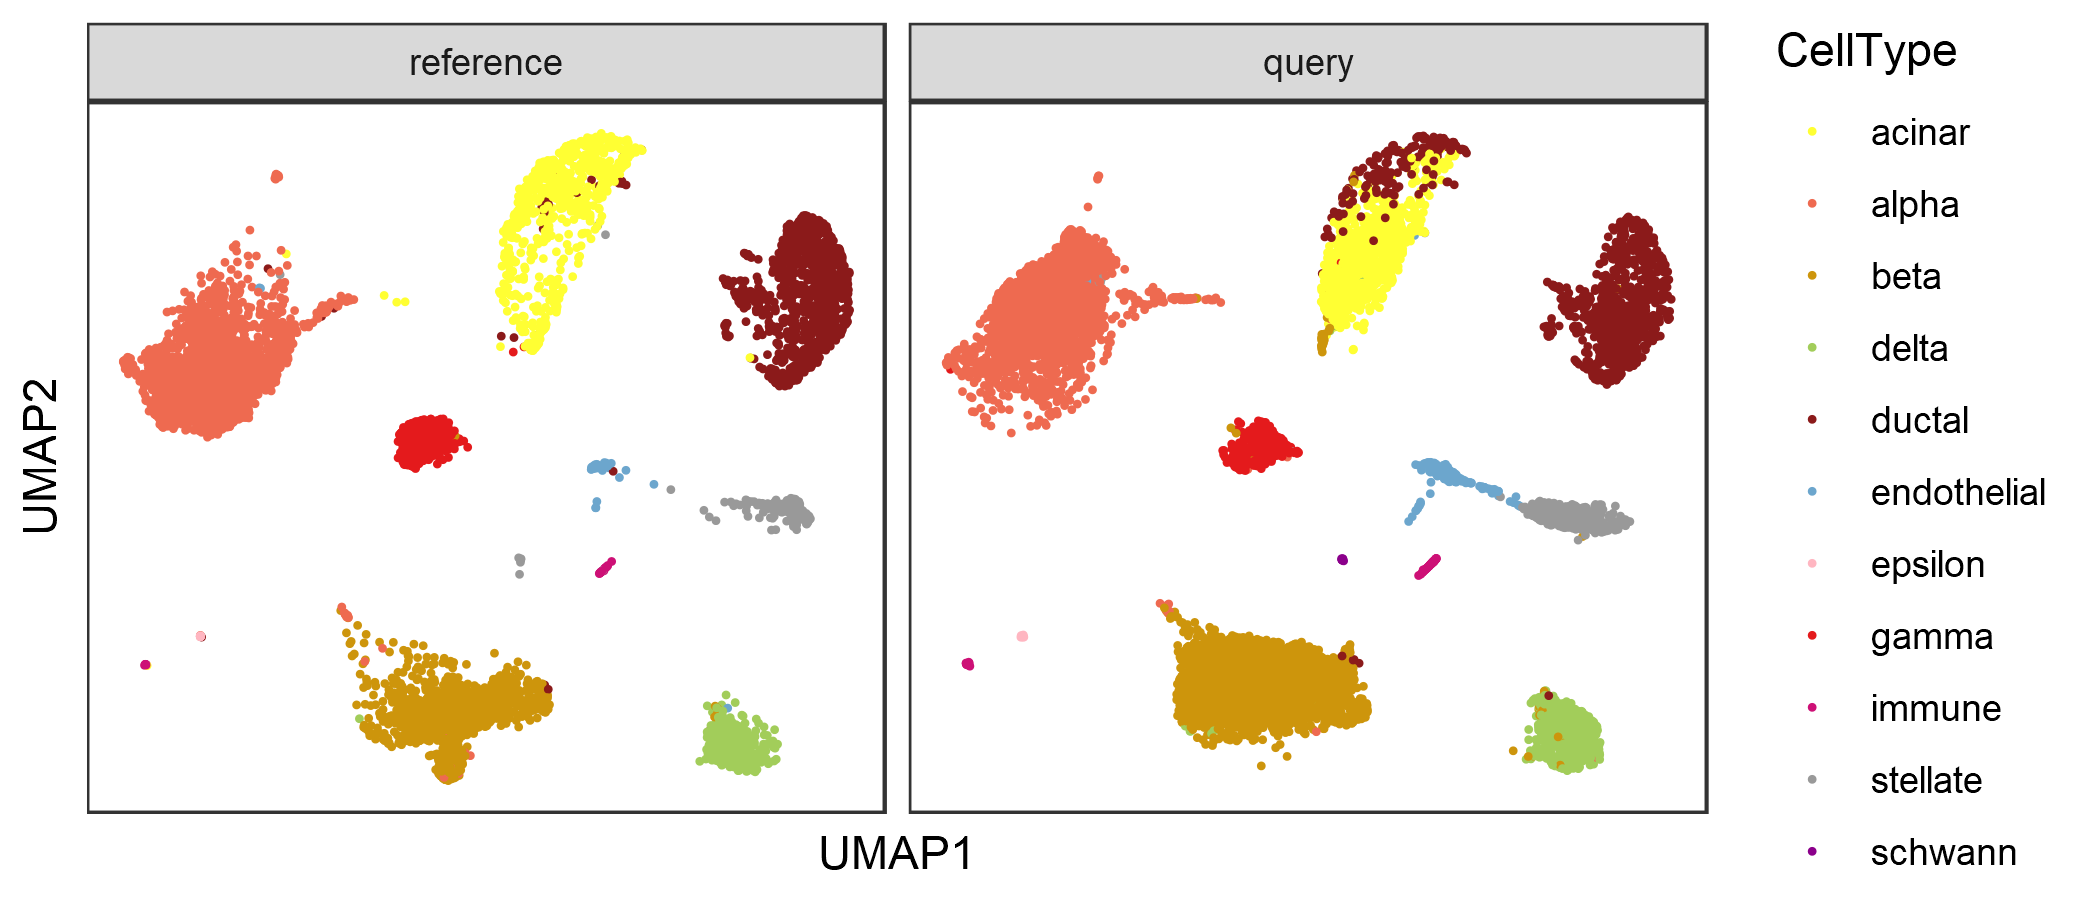

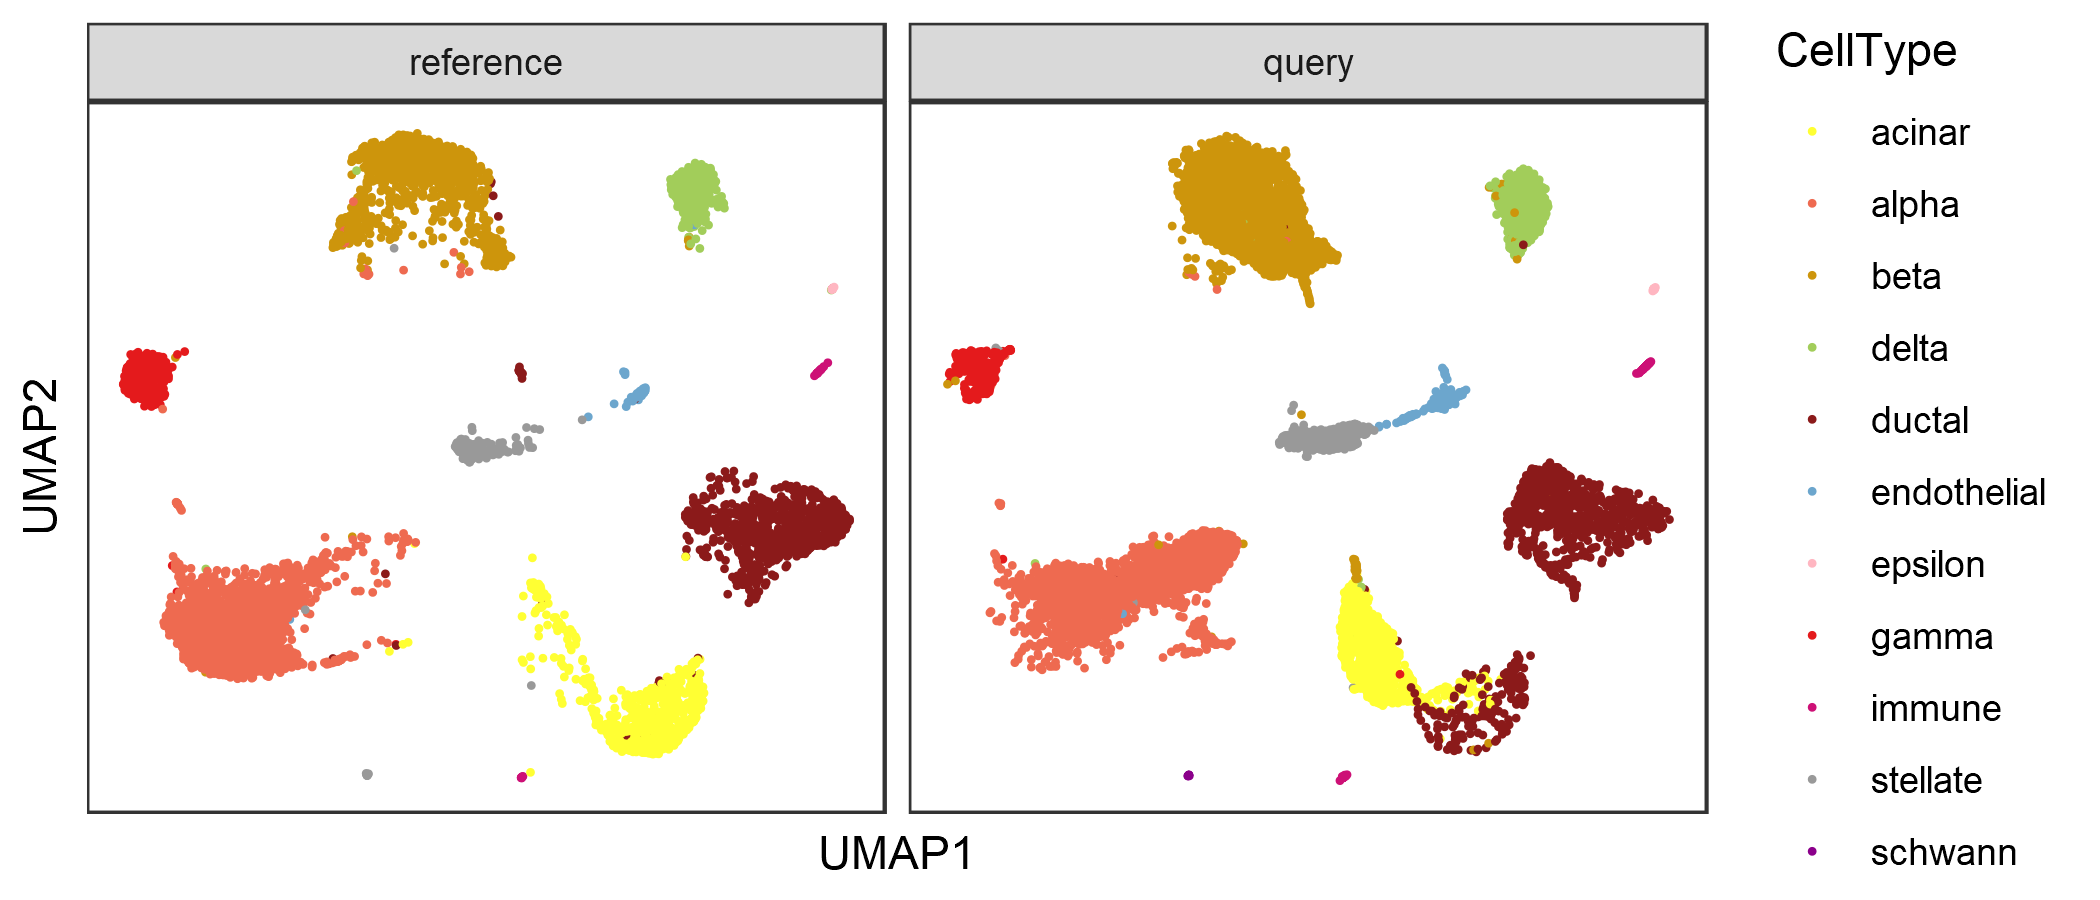

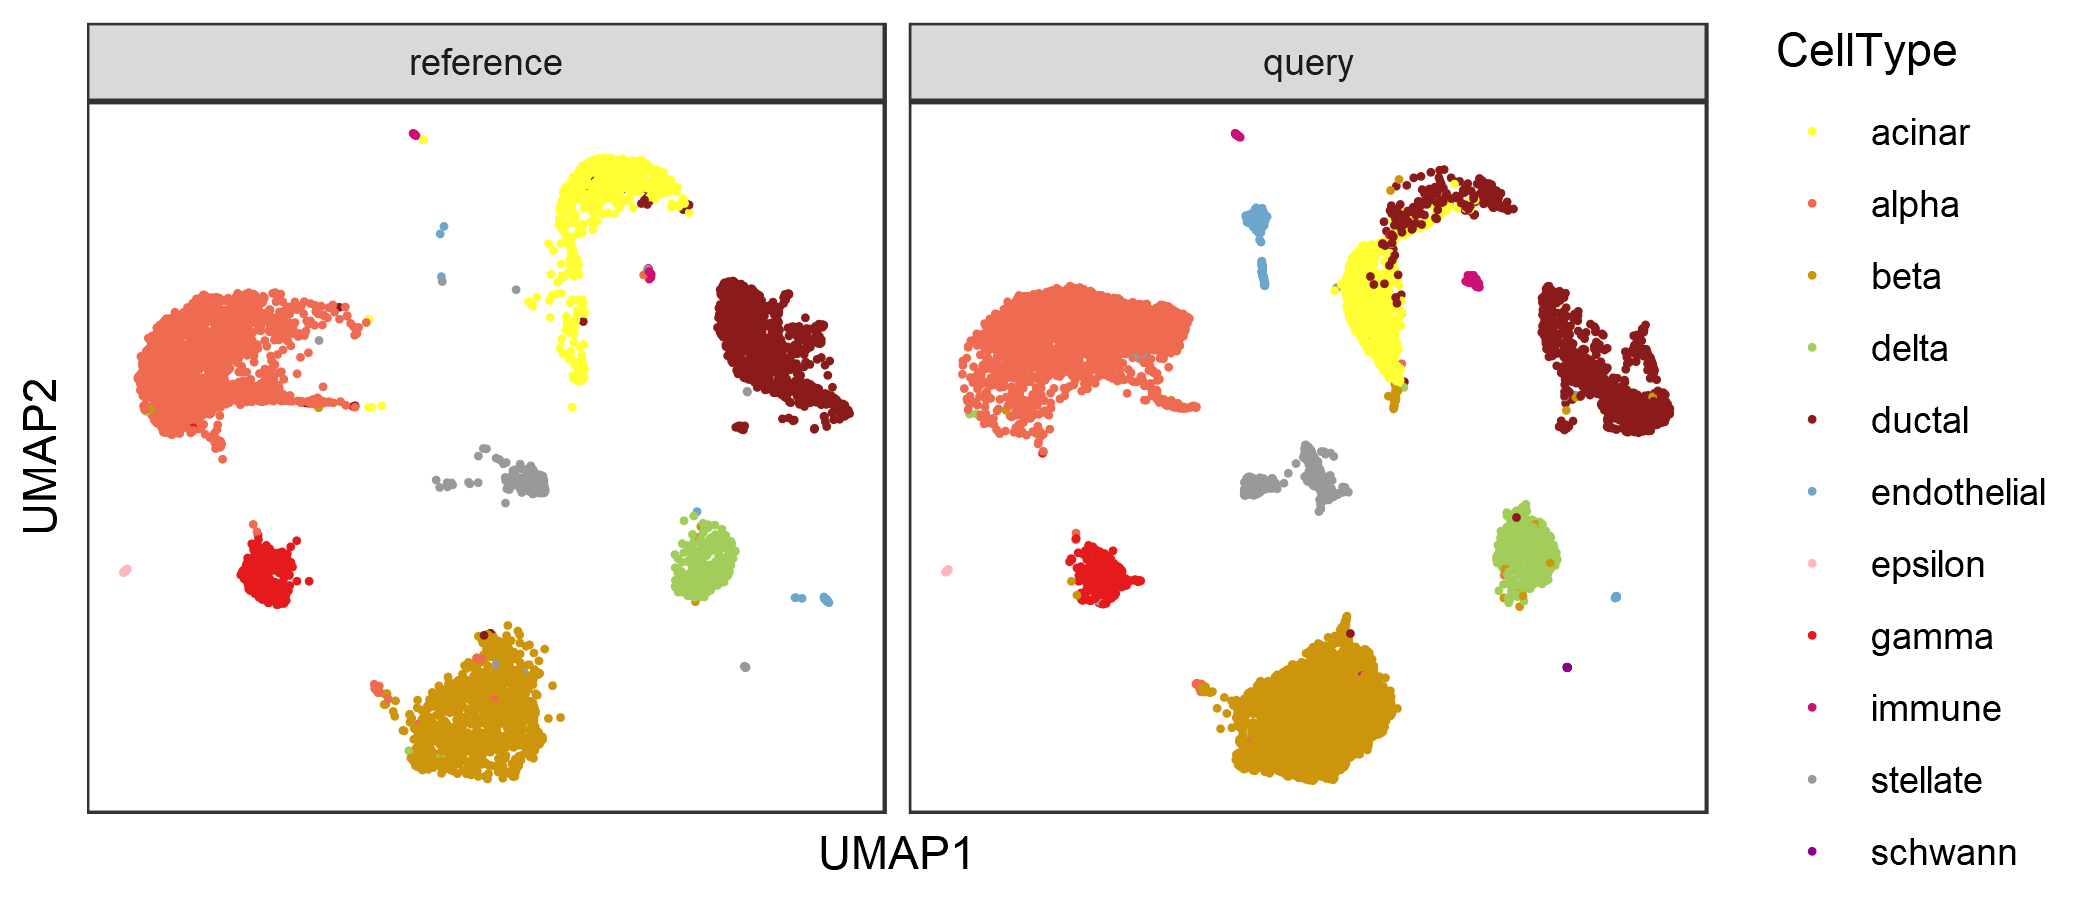

In [5]:
fig.size(3, 7)
Cols = c("#FFFF33", "#EE6A50", "#CD950C", "#A2CD5A", "#8B1A1A", "#6CA6CD", "#FFB6C1", "#E41A1C", "#CD1076", "#999999", "#8B008B")
ggplot(res_scInt_cpca, aes(x = UMAP1,y = UMAP2, color = CellType)) + 
        geom_point(aes(color = CellType), size = 0.1) + 
        scale_color_manual(values = Cols) + 
        labs(x = "UMAP1", y = "UMAP2", color = "CellType") + 
        theme_bw(base_line_size = 0) + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              axis.text.x = element_blank(), axis.text.y = element_blank(),
              axis.ticks.x = element_blank(), axis.ticks.y = element_blank()) + facet_wrap(~dataset)
ggplot(res_scInt_projection, aes(x = UMAP1,y = UMAP2, color = CellType)) + 
        geom_point(aes(color = CellType), size = 0.1) + 
        scale_color_manual(values = Cols) + 
        labs(x = "UMAP1", y = "UMAP2", color = "CellType") + 
        theme_bw(base_line_size = 0) + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              axis.text.x = element_blank(), axis.text.y = element_blank(),
              axis.ticks.x = element_blank(), axis.ticks.y = element_blank()) + facet_wrap(~dataset)
ggplot(res_scInt_global, aes(x = UMAP1,y = UMAP2, color = CellType)) + 
        geom_point(aes(color = CellType), size = 0.1) + 
        scale_color_manual(values = Cols) + 
        labs(x = "UMAP1", y = "UMAP2", color = "CellType") + 
        theme_bw(base_line_size = 0) + 
        theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
              axis.text.x = element_blank(), axis.text.y = element_blank(),
              axis.ticks.x = element_blank(), axis.ticks.y = element_blank()) + facet_wrap(~dataset)

In [6]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19044)

Matrix products: default

locale:
[1] LC_COLLATE=Chinese (Simplified)_China.936 
[2] LC_CTYPE=Chinese (Simplified)_China.936   
[3] LC_MONETARY=Chinese (Simplified)_China.936
[4] LC_NUMERIC=C                              
[5] LC_TIME=Chinese (Simplified)_China.936    

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] gtable_0.3.0       pheatmap_1.0.12    gridExtra_2.3      ggpubr_0.4.0      
 [5] RColorBrewer_1.1-2 RcppAnnoy_0.0.18   patchwork_1.0.1    cowplot_1.0.0     
 [9] ggplot2_3.3.5      scInt_1.0         

loaded via a namespace (and not attached):
  [1] readxl_1.3.1          uuid_1.0-4            backports_1.1.7      
  [4] RcppEigen_0.3.3.9.1   plyr_1.8.6            igraph_1.2.5         
  [7] repr_1.1.4            lazyeval_0.2.2        splines_4.0.2        
 [10] liste